In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [3]:
Eruptions = pd.read_csv('all_files.csv')
Eruptions.head()

,time,Unnamed: 1,Unnamed: 2,latitude,longitude,depth,mag,magType,nst,gap,...,Year,Month,Day,Eruption_Date,VEI,Lat_Eruption,Lon_Eruption,Lat_Dif,Lon_dif,Date_Dif
0,2002-08-19T15:03:23.600Z,8/19/2002,T15:03:23.600Z,37.697,14.967,5.0,2.8,md,9.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.037,0.037,9
1,2002-08-19T14:57:59.700Z,8/19/2002,T14:57:59.700Z,37.721,14.963,5.0,2.7,md,8.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.013,0.041,9
2,2002-08-19T12:05:21.700Z,8/19/2002,T12:05:21.700Z,37.708,14.965,5.0,2.8,md,10.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.026,0.039,9
3,2002-08-13T05:29:43.300Z,8/13/2002,T05:29:43.300Z,37.842,14.667,5.0,3.2,md,18.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.108,0.337,15
4,2002-08-13T02:35:50.000Z,8/13/2002,T02:35:50.000Z,37.840,14.662,5.0,2.5,md,5.0,NaN,...,2002,8,28,8/28/2002,3,37.734,15.004,0.106,0.342,15


## Data Pre-Processing

In [5]:
Eruptions.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
Name                object
Year                 int64
VEI                  int64
Lat_Eruption       float64
Lon_Eruption       float64
dtype: object

In [15]:
selected_features = Eruptions[['depth','mag','VEI']]
selected_features.head(10)

,depth,mag,VEI
0,10.0,4.1,3
1,5.0,2.8,3
2,5.0,2.7,3
3,5.0,2.8,3
4,5.0,3.2,3
5,5.0,2.5,3
6,5.0,3.4,3
7,2.9,2.5,3
8,22.4,2.6,3
9,5.0,2.8,3


In [8]:
X = selected_features.drop("VEI", axis=1)
y = selected_features["VEI"]
print(X.shape, y.shape)

(1187, 2) (1187,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.12604166690223417
Testing Score: 0.1488359206927724


Text(0.5, 1.0, 'Residual Plot')

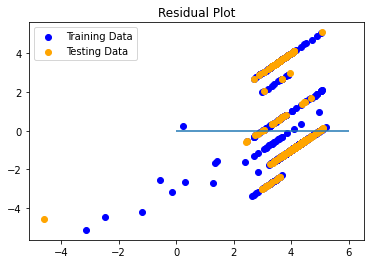

In [19]:
 # Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [11]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [13]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=20))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [32]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 12,402
Trainable params: 12,402
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

ValueError: Error when checking input: expected dense_input to have shape (20,) but got array with shape (6,)

## Quantify our Trained Model

In [16]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

792/1 - 0s - loss: 0.0328 - accuracy: 0.9798
Normal Neural Network - Loss: 0.05984371190777782, Accuracy: 0.9797979593276978


## Make Predictions

In [17]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [18]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['female' 'female' 'female' 'female' 'female']
Actual Labels: ['female', 'female', 'female', 'female', 'female']
